# **Adaboost Classifier**

## **Importing Libararies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

## **Data Overview**

In [2]:
df = pd.read_csv('heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:
df.shape

(5000, 13)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## **Exploratory Data Analysis**

### **Distribution of numerical features**

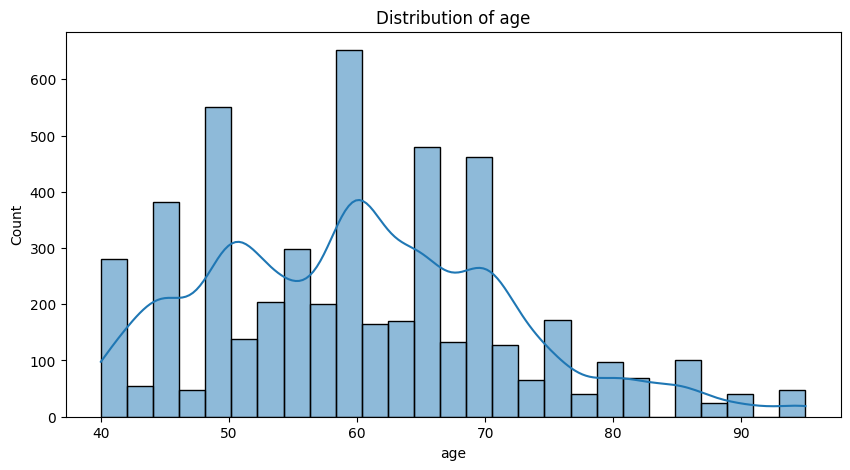

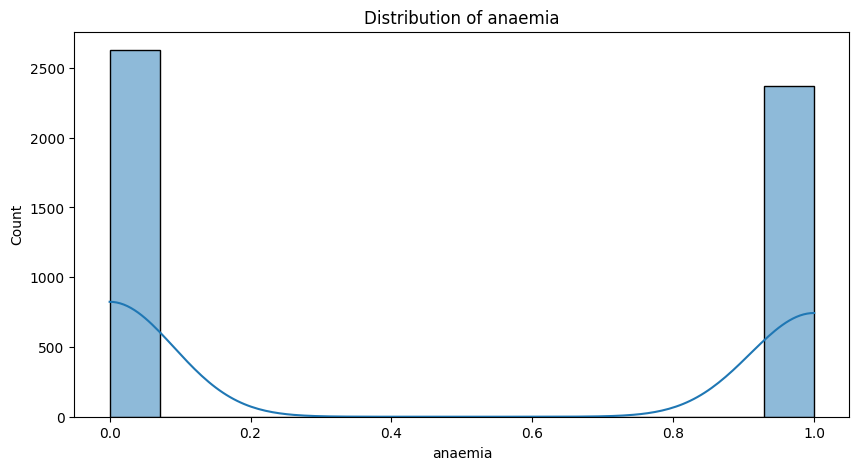

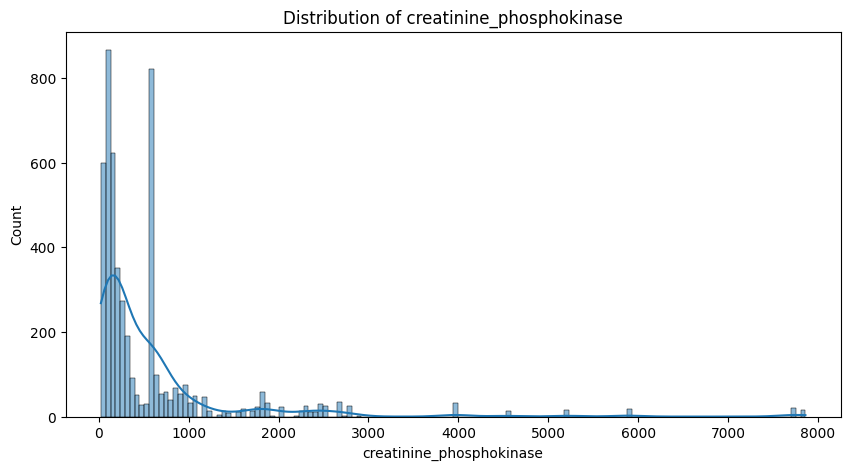

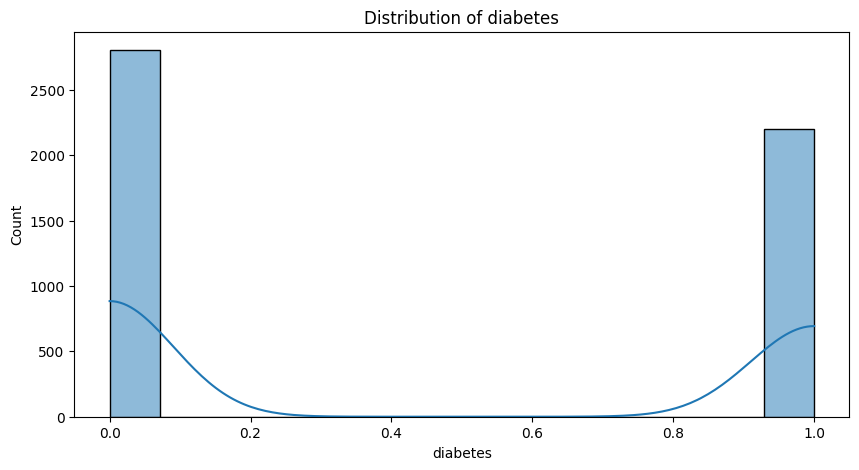

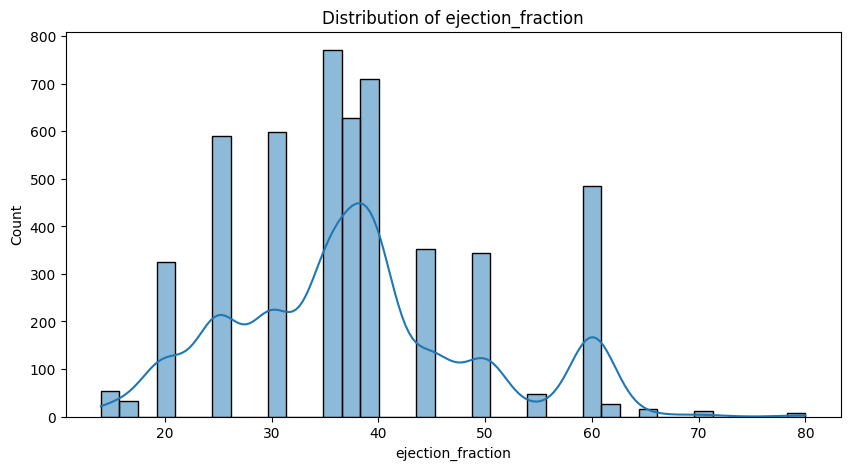

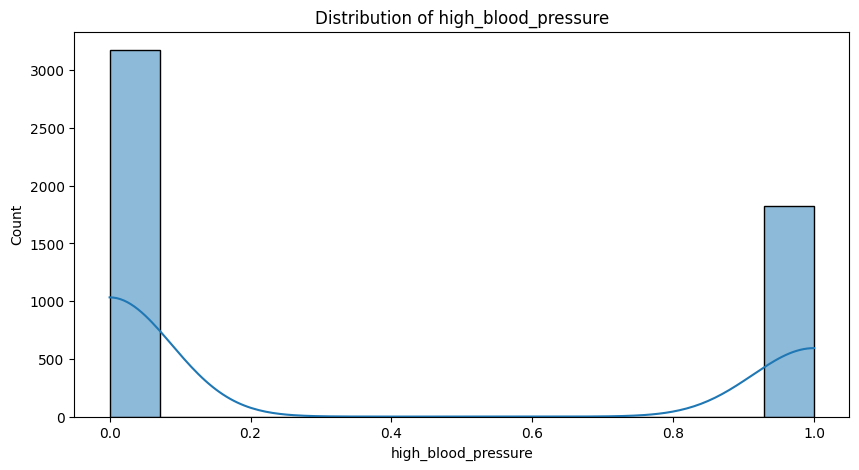

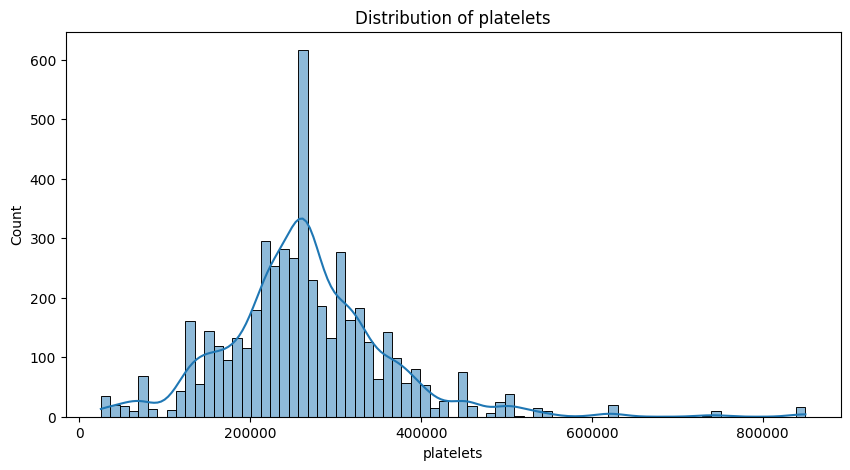

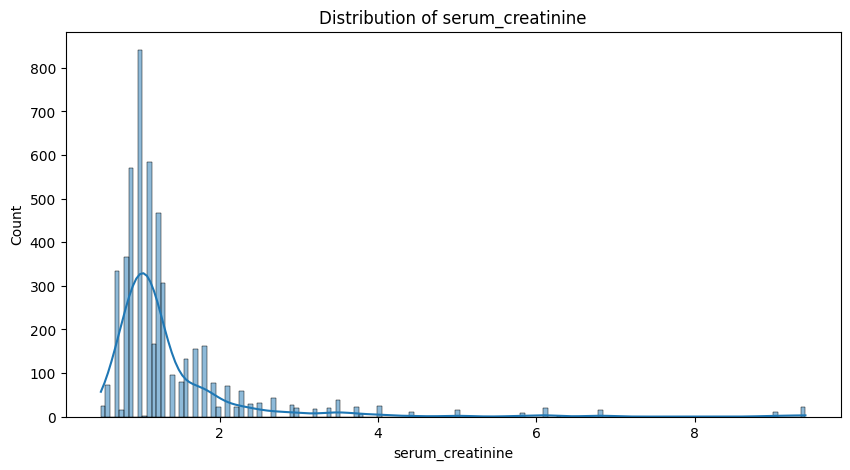

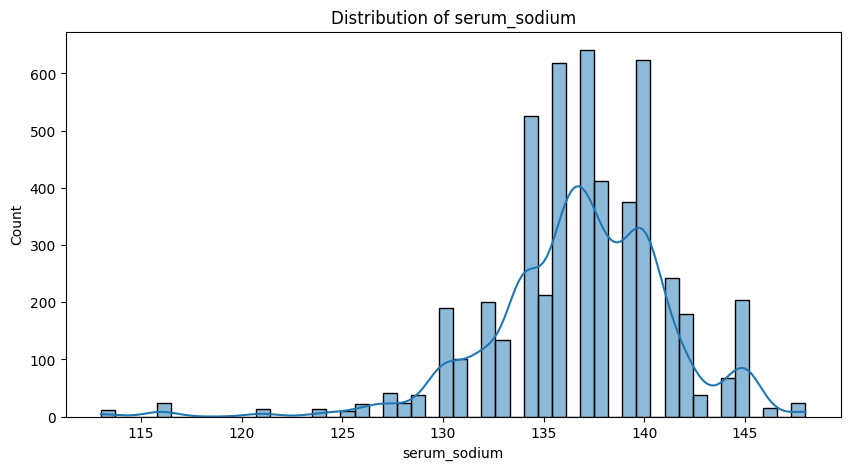

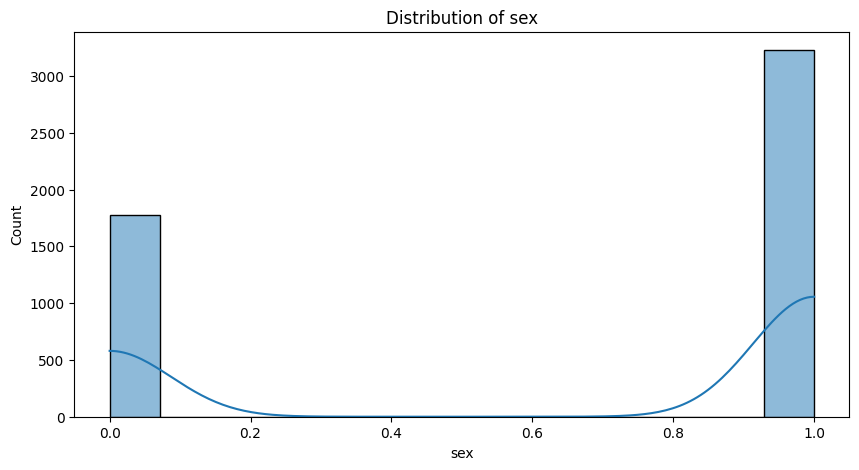

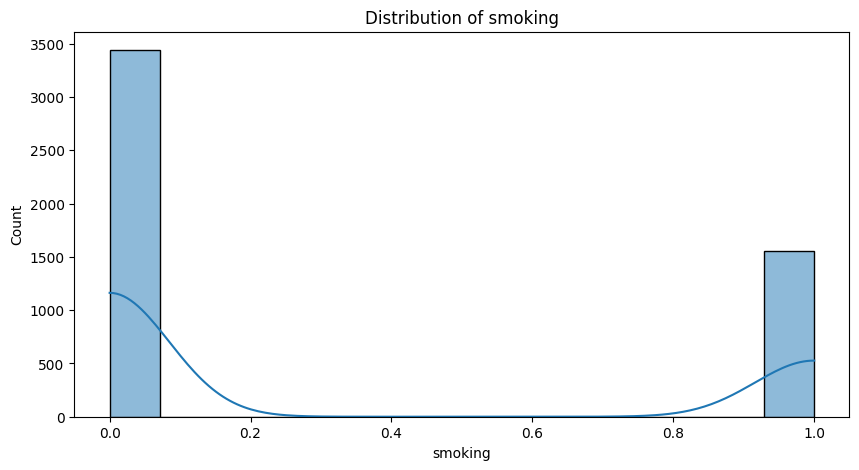

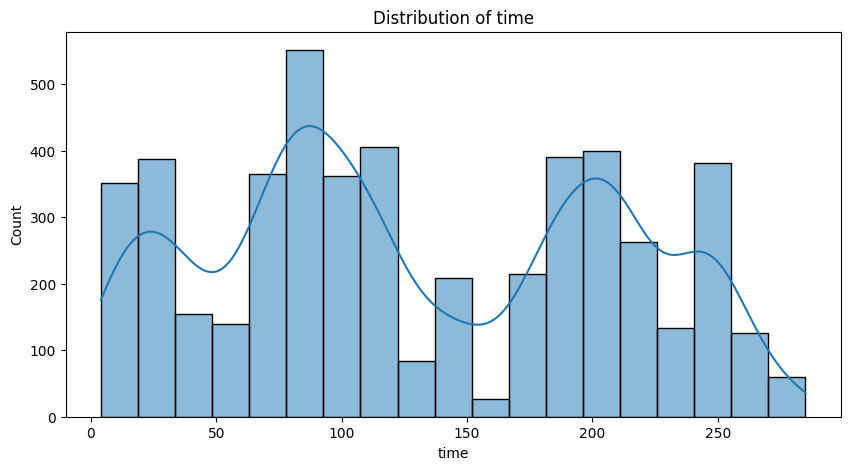

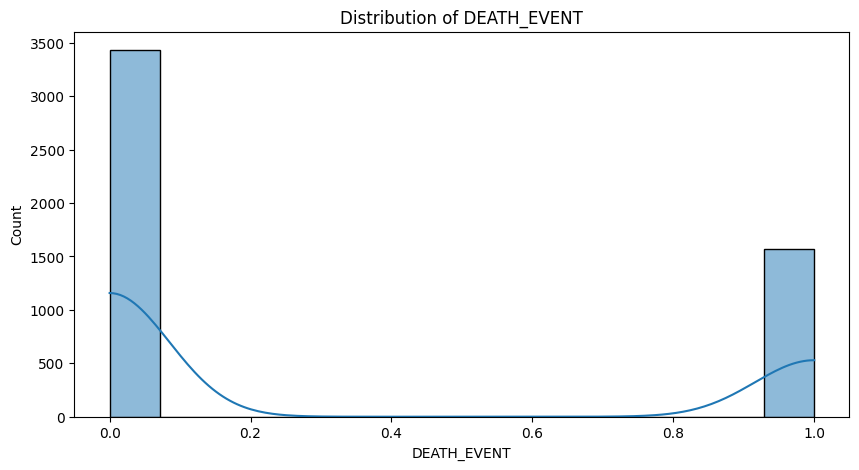

In [6]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### **Correlation heatmap**

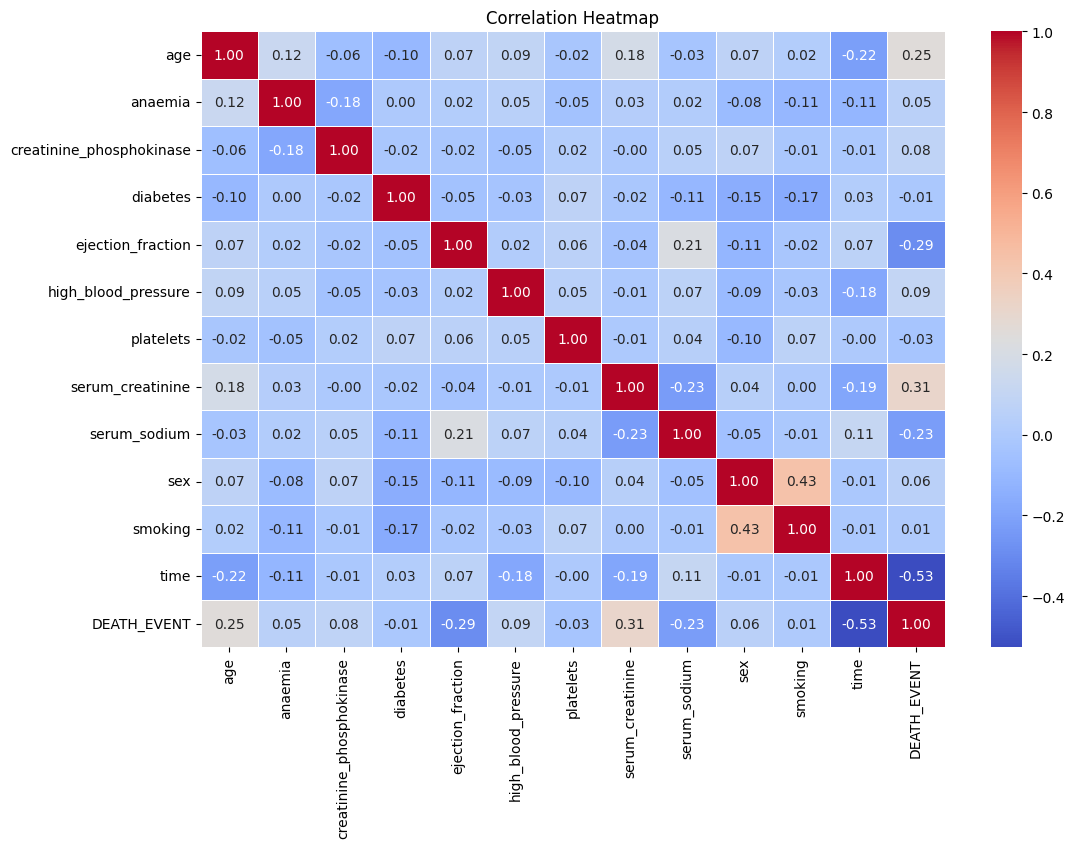

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Pairplot for numerical features**

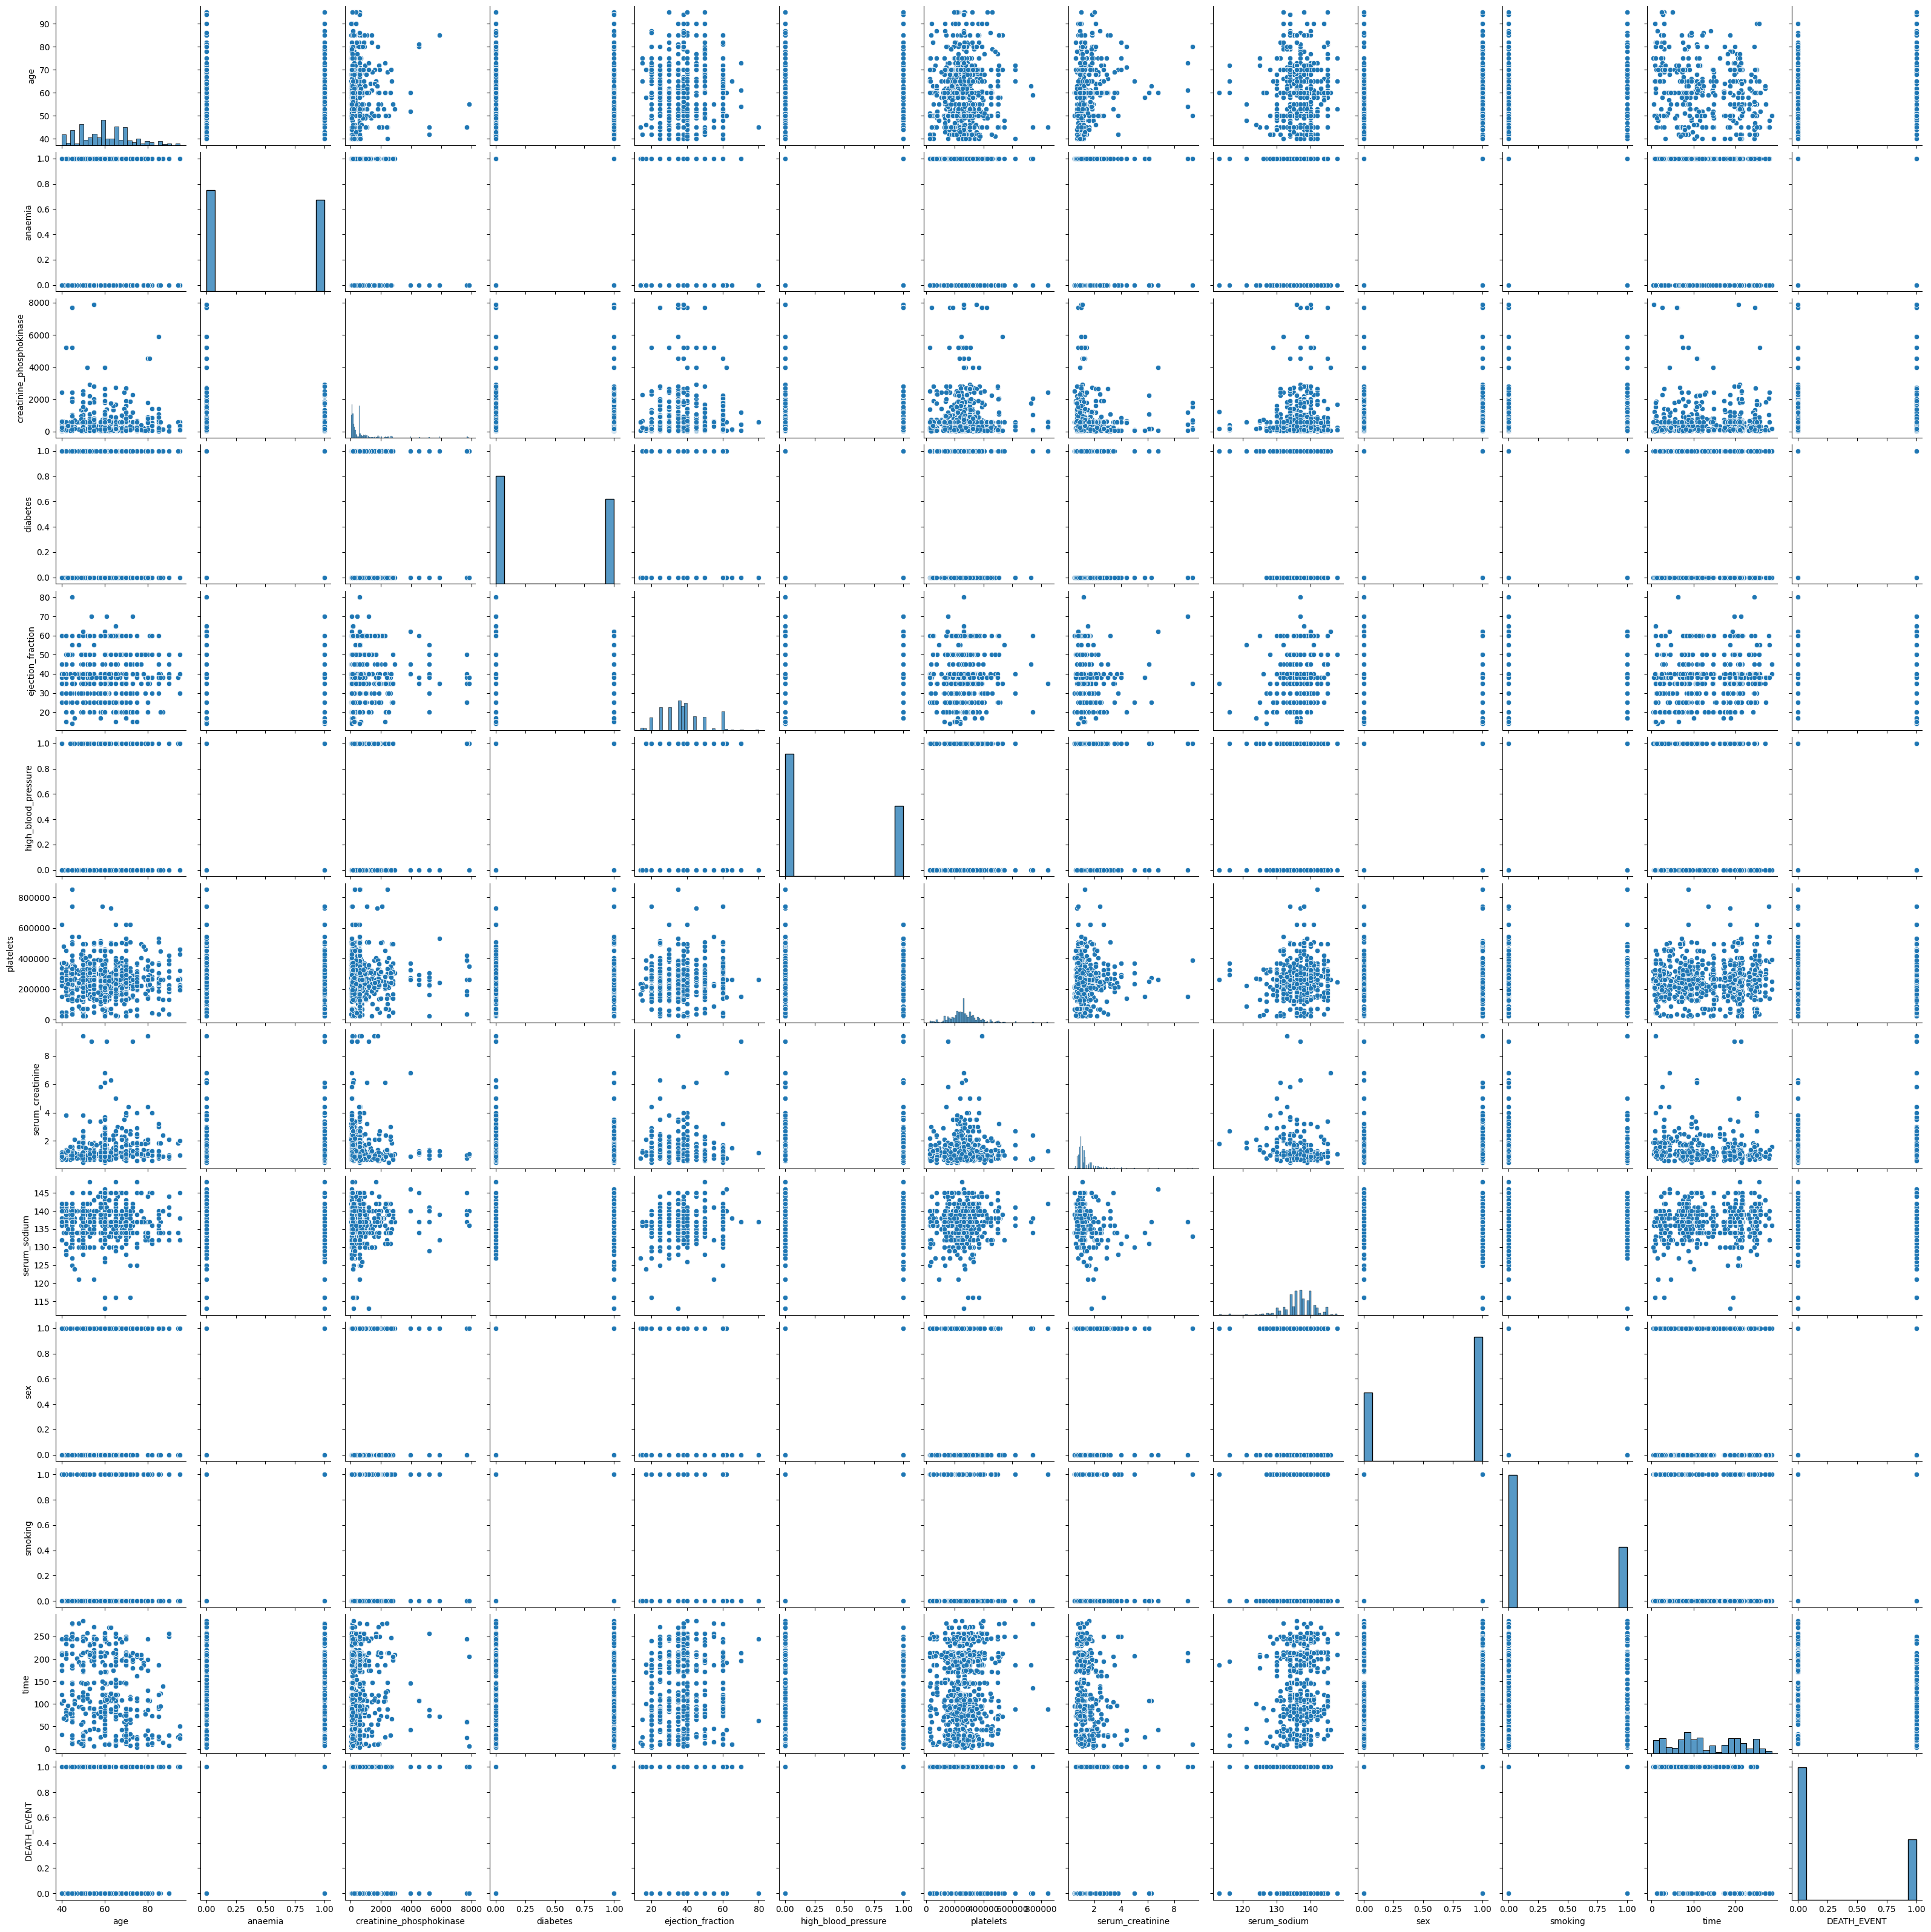

In [8]:
sns.pairplot(df[numerical_features])
plt.show()

### **Boxplots for numerical features against the target variable if applicable**

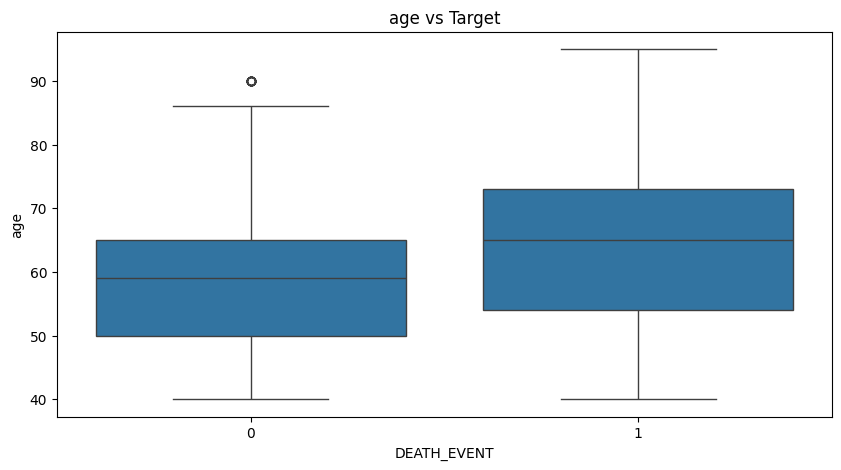

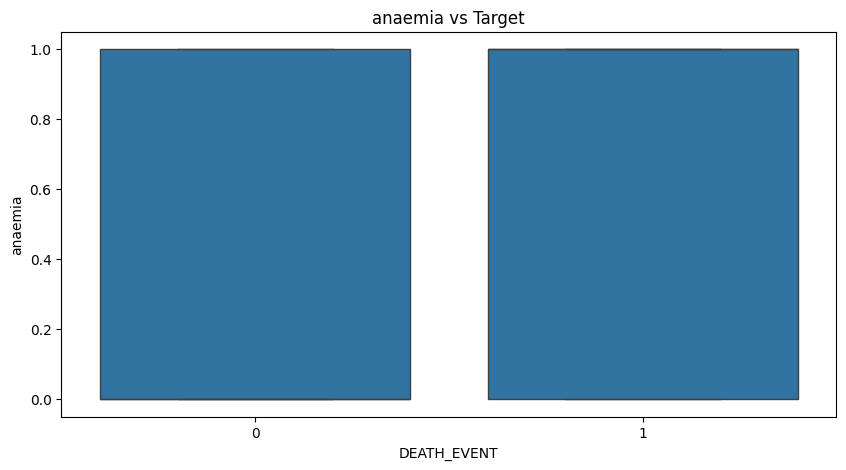

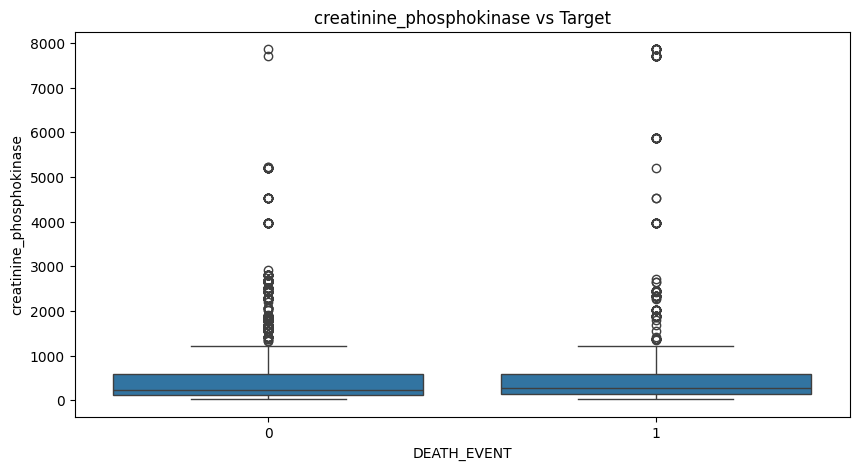

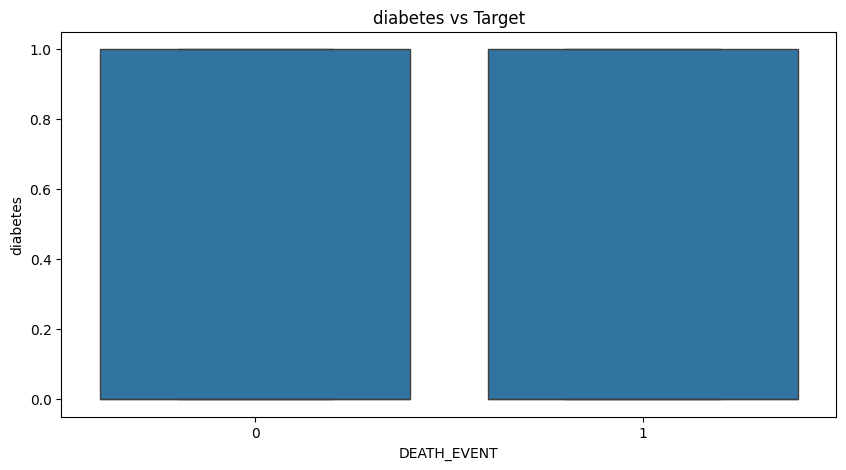

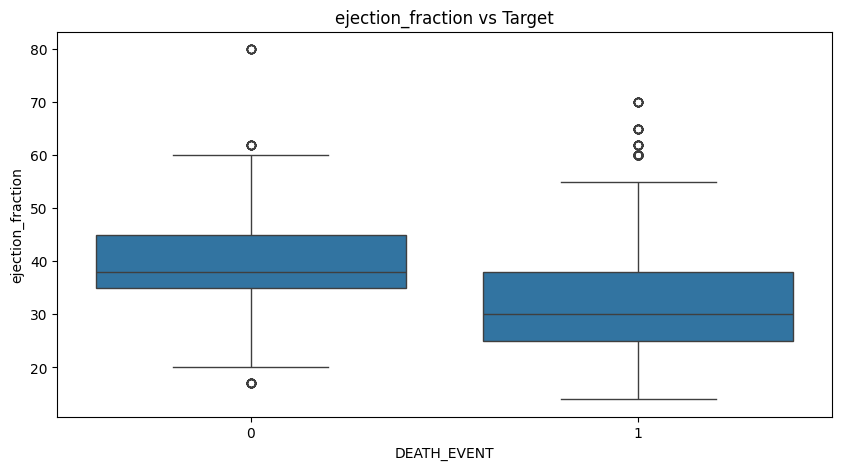

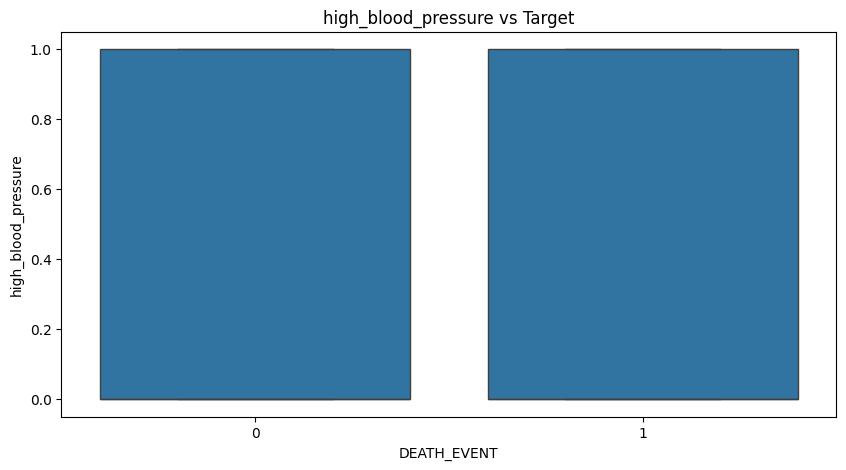

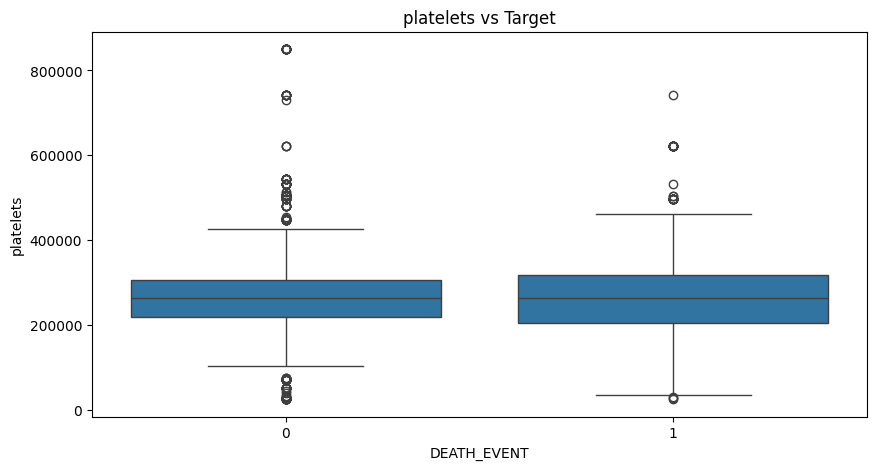

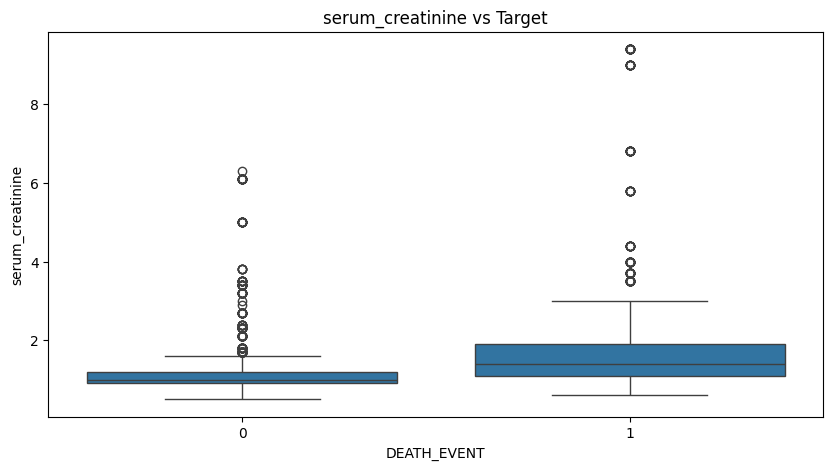

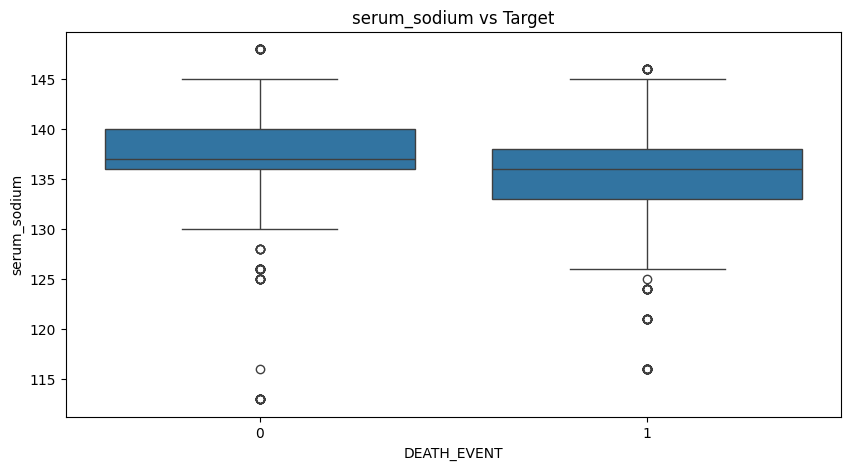

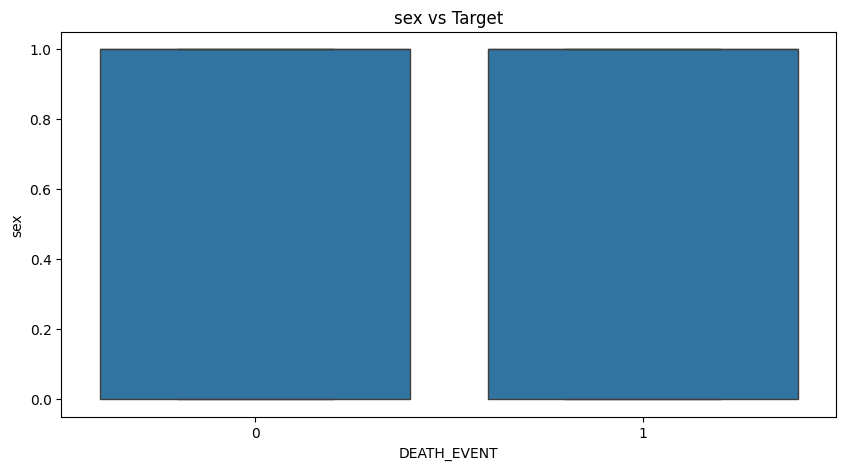

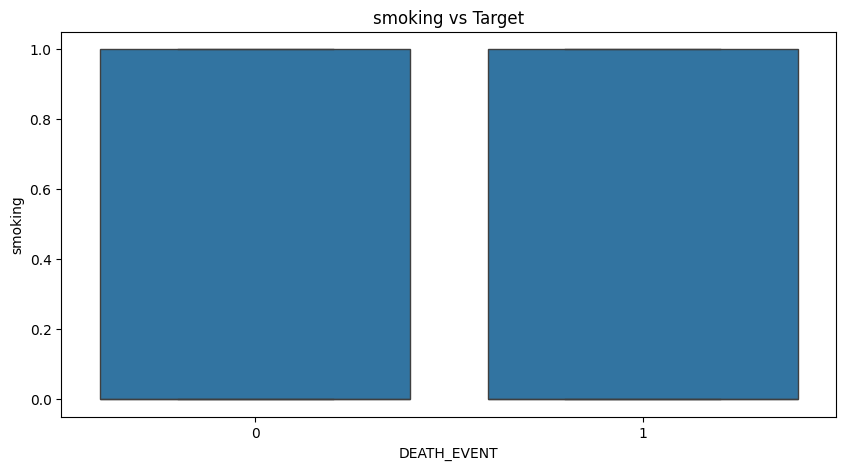

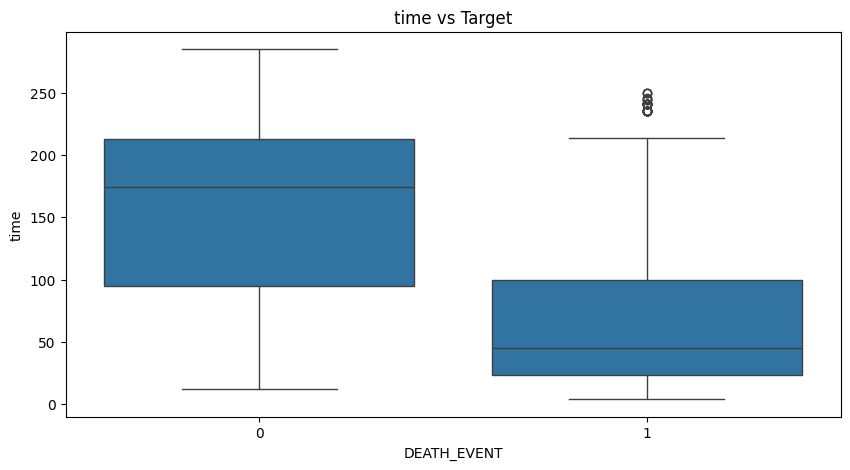

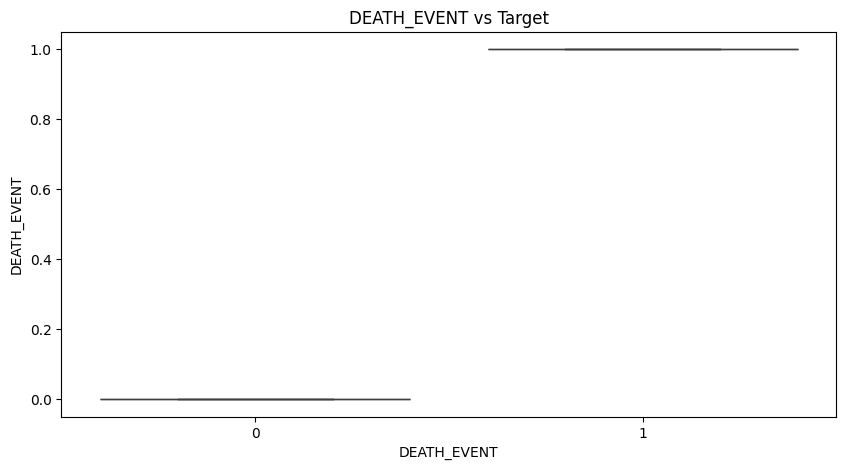

In [9]:
for col in numerical_features:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='DEATH_EVENT', y=col, data=df)
        plt.title(f'{col} vs Target')
        plt.show()

## **Splitting Data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='DEATH_EVENT'),
                                                    df['DEATH_EVENT'],
                                                    test_size=0.3,
                                                    random_state=42)

## **Preprocessing of Data**

In [11]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
1840,53.0,1,707,0,38,0,330000.0,1.4,137,1,1,209
2115,60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146
4437,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
1146,58.0,1,60,1,35,0,122000.0,0.9,139,1,1,71
2486,62.0,0,231,0,25,1,253000.0,0.9,140,1,1,10


In [12]:
X_train.shape

(3500, 12)

In [13]:
numerical_columns = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [14]:
handle_numerical = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('impute', SimpleImputer(strategy='mean'))
])

In [15]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns)
], remainder='passthrough')             

## **Modeling and Evaluation**

In [16]:
model = AdaBoostClassifier()

In [17]:
pipe = make_pipeline(preprocessing, model)

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler()),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11])])),
                ('adaboostclassifier', AdaBoostClassifier())])

In [19]:
y_pred = pipe.predict(X_test)

In [20]:
print(accuracy_score(y_test, y_pred))

0.92


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1040
           1       0.88      0.85      0.87       460

    accuracy                           0.92      1500
   macro avg       0.91      0.90      0.91      1500
weighted avg       0.92      0.92      0.92      1500



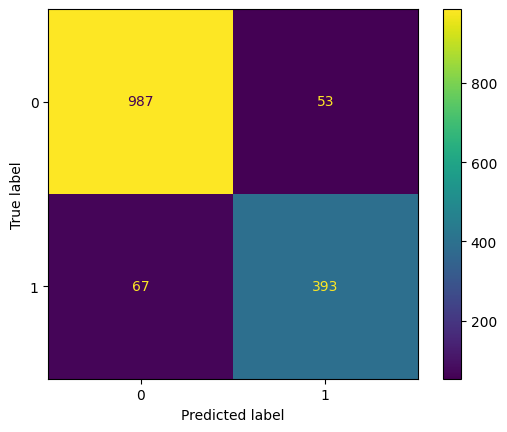

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()